In [20]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 10 ##

## Prediction ##

In [36]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [33]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [34]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


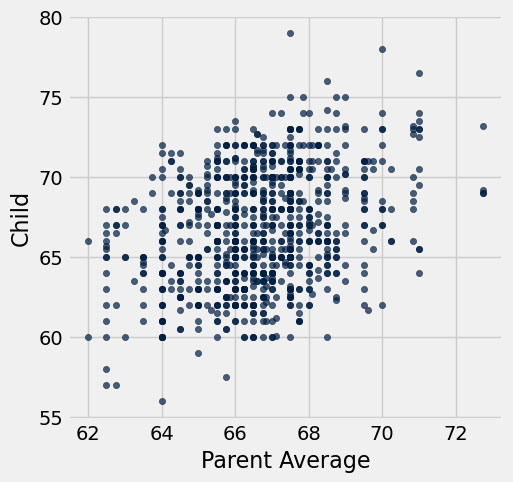

In [5]:
heights.scatter('Parent Average', 'Child')

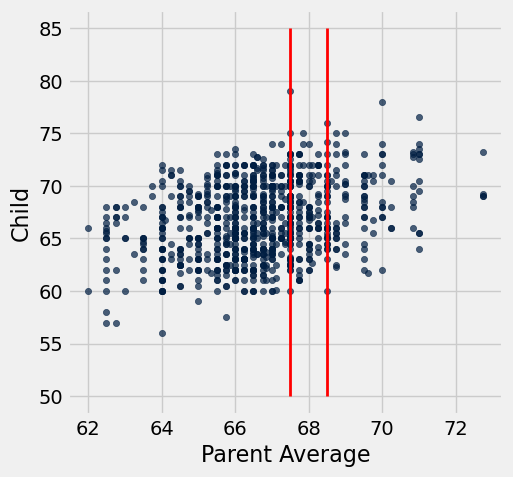

In [35]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [7]:
nearby = ...
nearby_mean = ...
nearby_mean

Ellipsis

In [ ]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [8]:
def predict(h):
    nearby = ...
    return ...

In [9]:
# Apply predict function to all average parent heights


In [ ]:
# Create new column with predictions

In [ ]:
#Visualize Scatterplot of predictions
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [ ]:
def difference(x, y):
    return x - y

In [ ]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
heights = heights.with_column('errors',pred_errs)
heights

In [ ]:
heights.hist('errors')

In [ ]:
heights.hist('errors', group='Sex')

# Discussion Question

In [38]:
def predict_smarter(h, s):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    ...

In [39]:
predict_smarter(68, 'female')

In [40]:
predict_smarter(68, 'male')

In [41]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)

In [42]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)

NameError: name 'difference' is not defined

In [ ]:
heights.hist('Smarter Errors', group='Sex')

## Grouping by One Column ##

In [ ]:
cones = Table.read_table('cones.csv').drop('Color')
cones

## Grouping By One Column: Welcome Survey ##

In [54]:
survey = Table.read_table('welcome_survey_su23.csv')
survey.show(3)

Year,Extraversion,Number of Textees,Hours of Sleep,Handedness,Pant Leg,Sleep Position,Pets
Rising second,5,5,9,Right-handed,I don't know,On your right side,None
Rising second,5,5,8,Left-handed,Left leg in first,On your stomach,"Dog, Fish"
Rising fifth or above,7,4,7,Right-handed,Right leg in first,On your stomach,None


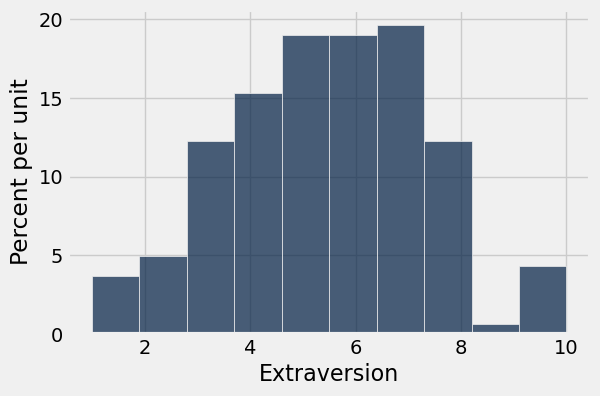

In [55]:
survey.hist('Extraversion')

## Lists

### Rows from Lists

In [72]:
Table().with_columns('Numbers', [1, 2, 3])

Numbers
1
2
3


In [61]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [63]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Grouping by Two Columns ##

![Do right-handed people tend to sleep on their left side and left-handed people sleep on their right?](handed.png)

## Pivot Tables

## Discussion Questions

In [77]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

sky = Table.read_table('skyscrapers.csv')
sky = (sky.with_column('age', 2022 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,8
Willis Tower,steel,Chicago,442.14,48
432 Park Avenue,concrete,New York City,425.5,7


In [78]:
# 1. For each city, what’s the tallest building for each material?


In [79]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?


In [81]:
# 3. Generate a table of the names of the oldest buildings for each 
#    material for each city:

# Hint: You can use sort to find the name of the oldest building in the dataset
sky.sort('age', descending=True).column('name').item(0)

'Statue of Liberty'

## Joins

In [82]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [83]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [84]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [85]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [86]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25
